# <span style="color:darkblue"> QTM 151 - Quiz 2 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [2]:
# Write your answer here

print("Derry Li")


Derry Li


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [3]:
# Write your answer here:
print("I will abide by Emory's Rule of Conduct")



I will abide by Emory's Rule of Conduct


<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", <br>
"pandas", "statsmodels.api" and "statsmodels.formula.api"


In [4]:
# Write your answer here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf



<font size = "5">

Read the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting <br>
to get a sense of its content

In [5]:
# Write your own code
players = pd.read_csv("data_quiz/fifa23_players_basic.csv")



<font size = "5">

(a) Use queries

<font size = "3">

- Browse the dataset and search for the height variable in cm (centimeters).

- Subset the players whose value of the height variable is above 175 <br>
and store it in a new dataset
- How many players are above this height threshold?

HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
and when the value is a string. See example provided.

In [6]:
# Write your own code

# Example: The following code filters whether 
# observations for which `On Loan` is equal to yes
# dataset.query(' `On Loan` == "YES" ')
# Note: be careful with using backward quotations ` here.
# Now apply this to your own example, and calculate the total number of observations.
height = players.query("`On Loan` == 'YES'")
summation = len(height)
summation


1229

<font size = "5">

(b) Use sorting + ".iloc[]"

<font size = "3">

The varable "Contract Until" shows the date in which a player's contract will expire.
- Use ".sort_values()" to order the "Contract Until" column <br>
from later dates to earlier dates.
- Get a subset with the 5 players in the dataset <br>
whose contracts will expire later.
- From this subset, display the names and year in which the contract will expire.

Your output should look something like this:

| Full Name | Contract Until |
| -------- | ------- | 
| José Luis García Vayá | 2032
| José Luis García Vayá | 2032
| Jon Moncayola Tollar | 2031
| Jon Moncayloa Tollar | 2031
| Josip Sutalo | 2028
| Aurelien Tchouaméni | 2028


In [7]:
# Write your own code
playersorted = players.sort_values(by = "Contract Until", ascending = False)
subplayer = playersorted.iloc[0:5, [0,19]]
print(subplayer)





      Unnamed: 0 Contract Until
1876        1876           2032
1806        1806           2032
1478        1478           2031
1523        1523           2031
1649        1649           2028


<font size = "5">

(c) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "TotalStats"
- If "TotalStats > 85", classification = "Top Performer"
- If "TotalStats <= 85", classification = "Non Top-Performer"
- The function returns "classification"

Step 2:
- Extract the column "TotalStats" in the dataset <br>
- Create a new variable called "player_classification" <br>
to assign each player to the correct classification

HINT: Use the ".apply()" function

In [ ]:
# Write your own code
def totalstats(TotalStats):
    if TotalStats > 85:
        classification = "Top Performer"
    elif TotalStats <= 85:
        classification = "Non Top-Peformer"
    return classification

players["player_classification"] = players["TotalStats"].apply(totalstats)




0        Top Performer
1        Top Performer
2        Top Performer
3        Top Performer
4        Top Performer
             ...      
18534    Top Performer
18535    Top Performer
18536    Top Performer
18537    Top Performer
18538    Top Performer
Name: player_classification, Length: 18539, dtype: object

<font size = "5">

(d) Regression function

<font size = "3">

- Run a regression of "Overall" (left-hand side) on "Age" (right-hand side)
- What are the values of the coefficients?

[HINT: Use the commands ```smf.ols()``` and ```.fit()``` and ```.params``` <br>
from Lecture 11 ]


In [9]:
# Write your own code

model   = smf.ols(formula = 'Age ~  Overall', data = players)
results = model.fit()
b_list = results.params
print(b_list)




Intercept    4.993335
Overall      0.307463
dtype: float64


<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Store the total number of rows of the dataset in a variable called ```n``` <br>
- Create a new variable called ```random_var``` drawn from a <br>
uniform distribution between 0 and 1 with size ```n```
- Use .query() to subset all observations with ```random_var <0.4```.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with ```random_var >= 0.4```.<br>
store it in a new dataset called "data1"

[HINT: See Lecture 2 for how to generate a uniform random variable]


In [10]:
# Write your own code
n = len(players)
np.random.seed(42)
players["random_var"] = np.random.uniform(0,1, size = n)
data0 = players.query("random_var <0.4")
data1 = players.query("random_var >=0.4")


<font size = "5">

(f) Create two overlapping scatter plots

<font size = "3">

- This question requires the two datasets you created in (e)
- Display a scatter plot of "Potential" vs "Age" for "data0" using <br>
```plt.scatter()```
- Display a scatter plot of "Potential" vs "Age" for "data1" overlapping <br> 
on top of the previous one 
- You will need to add a legend, label the axes, and the title
- To get full points, plot the scatter plot with the option  ```alpha = 0.5```, e.g. <br>
 ``` plt.hist(x = ..., y = ... , alpha = 0.5) ``` <br>
 Make sure to substitute the corresponding "x" and "y" vectors instead of ```...``` <br>
(The alpha option sets the transparency of the scatter plot)

Note: The goal of this question is to illustrate that random <br>
assignment will produce very similar scatter plots for each variable

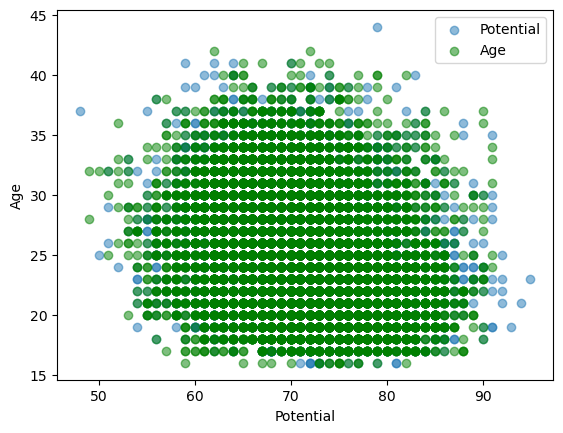

In [11]:
# Write your own code
plt.scatter(x = data0["Potential"], y = data0["Age"], alpha = 0.5)
plt.scatter(x = data1["Potential"], y = data1["Age"], color = 'green', alpha = 0.5)

plt.xlabel("Potential")
plt.ylabel("Age")
plt.legend(labels = ["Potential", "Age"])
plt.show()
